# **import**

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
import pandas as pd
import numpy as np
import io
import sklearn 
from datetime import datetime, timedelta

In [4]:
df = pd.read_csv('/content/drive/MyDrive/DATA/4. 1+2+3_DFEDTAR_data.csv')

#형태 확인
df

,Unnamed: 0,DATE,DFEDTAR,NASDAQCOM,BAMLH0A0HYM2,HSN1F,UMCSENT,UNRATE,M2,ICSA,NG,ZG,ZI,HG,USD/KRW,USD/EUR,USD/CNY
0,0,1999-01-01,4.75,2208.05,5.63,875.0,103.9,4.3,4395.0,331000.0,2.071,286.4,4.902,0.6440,1186.25,0.8455,8.2793
1,1,1999-01-02,4.75,2208.05,5.63,875.0,103.9,4.3,4395.0,331000.0,2.071,286.4,4.902,0.6440,1186.25,0.8455,8.2793
2,2,1999-01-03,4.75,2208.05,5.63,875.0,103.9,4.3,4395.0,331000.0,2.071,286.4,4.902,0.6440,1186.25,0.8455,8.2793
3,3,1999-01-04,4.75,2208.05,5.63,875.0,103.9,4.3,4395.0,331000.0,2.071,286.4,4.902,0.6440,1186.25,0.8455,8.2793
4,4,1999-01-05,4.75,2251.27,5.57,875.0,103.9,4.3,4395.0,331000.0,1.975,286.4,4.902,0.6390,1164.50,0.8501,8.2795
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8186,8186,2021-05-31,0.25,13748.74,3.34,863.0,88.3,5.8,19417.7,385000.0,2.986,1905.3,28.014,4.6775,1106.58,0.8177,6.3688
8187,8187,2021-06-01,0.25,13736.48,3.33,863.0,88.3,5.8,19417.7,385000.0,3.104,1905.0,28.102,4.6535,1108.38,0.8187,6.3796
8188,8188,2021-06-02,0.25,13756.33,3.31,863.0,88.3,5.8,19417.7,385000.0,3.075,1909.9,28.204,4.5915,1110.92,0.8188,6.3805
8189,8189,2021-06-03,0.25,13614.51,3.28,863.0,88.3,5.8,19417.7,385000.0,3.041,1873.3,27.477,4.4630,1116.46,0.8245,6.4036


In [5]:
#필요없는 열 제거 
df = df.drop("Unnamed: 0", axis=1)
df.shape

(8191, 16)

#**EDA**

In [6]:
df.describe()

,DFEDTAR,NASDAQCOM,BAMLH0A0HYM2,HSN1F,UMCSENT,UNRATE,M2,ICSA,NG,ZG,ZI,HG,USD/KRW,USD/EUR,USD/CNY
count,8191.000000,8191.000000,8191.000000,8191.000000,8191.000000,8191.000000,8191.000000,8.191000e+03,8191.000000,8191.000000,8191.000000,8191.000000,8191.000000,8191.000000,8191.000000
mean,1.906757,3924.908154,5.698701,710.789281,86.443218,5.910011,9476.099853,3.950409e+05,4.380318,979.563875,15.214989,2.412573,1130.790382,0.849295,7.221054
std,1.925270,2657.389371,2.659997,293.108271,12.512274,1.949113,3829.401347,3.670504e+05,2.241500,521.991045,8.664783,1.115774,99.090872,0.121646,0.815860
min,0.250000,1114.110000,2.410000,270.000000,55.300000,3.500000,4395.000000,2.030000e+05,1.482000,253.000000,4.048000,0.604000,900.800000,0.625300,6.041200
25%,0.250000,2141.095000,3.890000,444.000000,76.900000,4.400000,6298.800000,2.860000e+05,2.772000,413.400000,6.728000,1.308000,1078.380000,0.758000,6.505000
50%,1.250000,2738.630000,4.970000,658.000000,88.800000,5.400000,8518.500000,3.350000e+05,3.746000,1128.400000,15.888000,2.713500,1132.520000,0.830900,6.883300
75%,3.000000,4928.695000,6.810000,936.000000,95.700000,6.800000,12230.200000,4.050000e+05,5.481000,1377.700000,19.005000,3.289000,1185.510000,0.908300,8.276600
max,6.500000,14138.780000,21.820000,1389.000000,112.000000,14.800000,19470.000000,6.149000e+06,15.378000,2103.200000,48.584000,4.762000,1570.650000,1.208900,8.280000


요약서술된 부분의 max 혹은 mean등을 보니 크게 이상치가 없는것 같고 
분석에 이용되어도 괜찮을 것 같습니다.

In [7]:
df.dtypes

DATE             object
DFEDTAR         float64
NASDAQCOM       float64
BAMLH0A0HYM2    float64
HSN1F           float64
UMCSENT         float64
UNRATE          float64
M2              float64
ICSA            float64
NG              float64
ZG              float64
ZI              float64
HG              float64
USD/KRW         float64
USD/EUR         float64
USD/CNY         float64
dtype: object

date가 object로 되어 있으니 datetime으로 변경해 주도록 하겠습니다 

In [8]:
df['DATE']=pd.to_datetime(df['DATE'])
df.dtypes

DATE            datetime64[ns]
DFEDTAR                float64
NASDAQCOM              float64
BAMLH0A0HYM2           float64
HSN1F                  float64
UMCSENT                float64
UNRATE                 float64
M2                     float64
ICSA                   float64
NG                     float64
ZG                     float64
ZI                     float64
HG                     float64
USD/KRW                float64
USD/EUR                float64
USD/CNY                float64
dtype: object

In [9]:
df.corr()

,DFEDTAR,NASDAQCOM,BAMLH0A0HYM2,HSN1F,UMCSENT,UNRATE,M2,ICSA,NG,ZG,ZI,HG,USD/KRW,USD/EUR,USD/CNY
DFEDTAR,1.000000,-0.224060,-0.161525,0.522351,0.494584,-0.605847,-0.541088,-0.182648,0.345602,-0.665224,-0.584549,-0.400816,-0.270729,0.379432,0.691218
NASDAQCOM,-0.224060,1.000000,-0.347684,-0.087460,0.208766,-0.140422,0.894673,0.192457,-0.458188,0.646665,0.368207,0.357743,-0.029892,0.069236,-0.439959
BAMLH0A0HYM2,-0.161525,-0.347684,1.000000,-0.263964,-0.477725,0.352843,-0.246641,0.218566,-0.036947,-0.160678,-0.152026,-0.297629,0.672936,0.126967,0.032889
HSN1F,0.522351,-0.087460,-0.263964,1.000000,0.500893,-0.479626,-0.362456,-0.022191,0.335361,-0.664835,-0.699375,-0.618058,-0.087970,0.404525,0.833606
UMCSENT,0.494584,0.208766,-0.477725,0.500893,1.000000,-0.741905,-0.075750,-0.274194,-0.256595,-0.364094,-0.497017,-0.495599,-0.029725,0.614931,0.421373
UNRATE,-0.605847,-0.140422,0.352843,-0.479626,-0.741905,1.000000,0.096872,0.504487,-0.094688,0.392369,0.489721,0.353282,0.204253,-0.437179,-0.380830
M2,-0.541088,0.894673,-0.246641,-0.362456,-0.075750,0.096872,1.000000,0.217050,-0.449634,0.867930,0.603446,0.577797,-0.035854,-0.187917,-0.722503
ICSA,-0.182648,0.192457,0.218566,-0.022191,-0.274194,0.504487,0.217050,1.000000,-0.106317,0.176876,0.066201,0.025157,0.183997,-0.007208,-0.032085
NG,0.345602,-0.458188,-0.036947,0.335361,-0.256595,-0.094688,-0.449634,-0.106317,1.000000,-0.412565,-0.254954,0.014957,-0.450031,-0.344982,0.342699
ZG,-0.665224,0.646665,-0.160678,-0.664835,-0.364094,0.392369,0.867930,0.176876,-0.412565,1.000000,0.895839,0.796667,-0.105672,-0.434853,-0.904748


# **1. EDA - 데이터 시각화**

In [12]:
import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns

print("Matplotlib version", matplotlib.__version__)
%matplotlib inline
%config InlineBackend.figure_format = 'retina'

plt.rcParams["font.family"] = 'nanummyeongjo'
plt.rcParams["axes.grid"] = True
plt.rcParams["figure.figsize"] = (12,6)
plt.rcParams["axes.formatter.useoffset"] = False
plt.rcParams['axes.unicode_minus'] = False
plt.rcParams["axes.formatter.limits"] = -10000, 10000

Matplotlib version 3.2.2


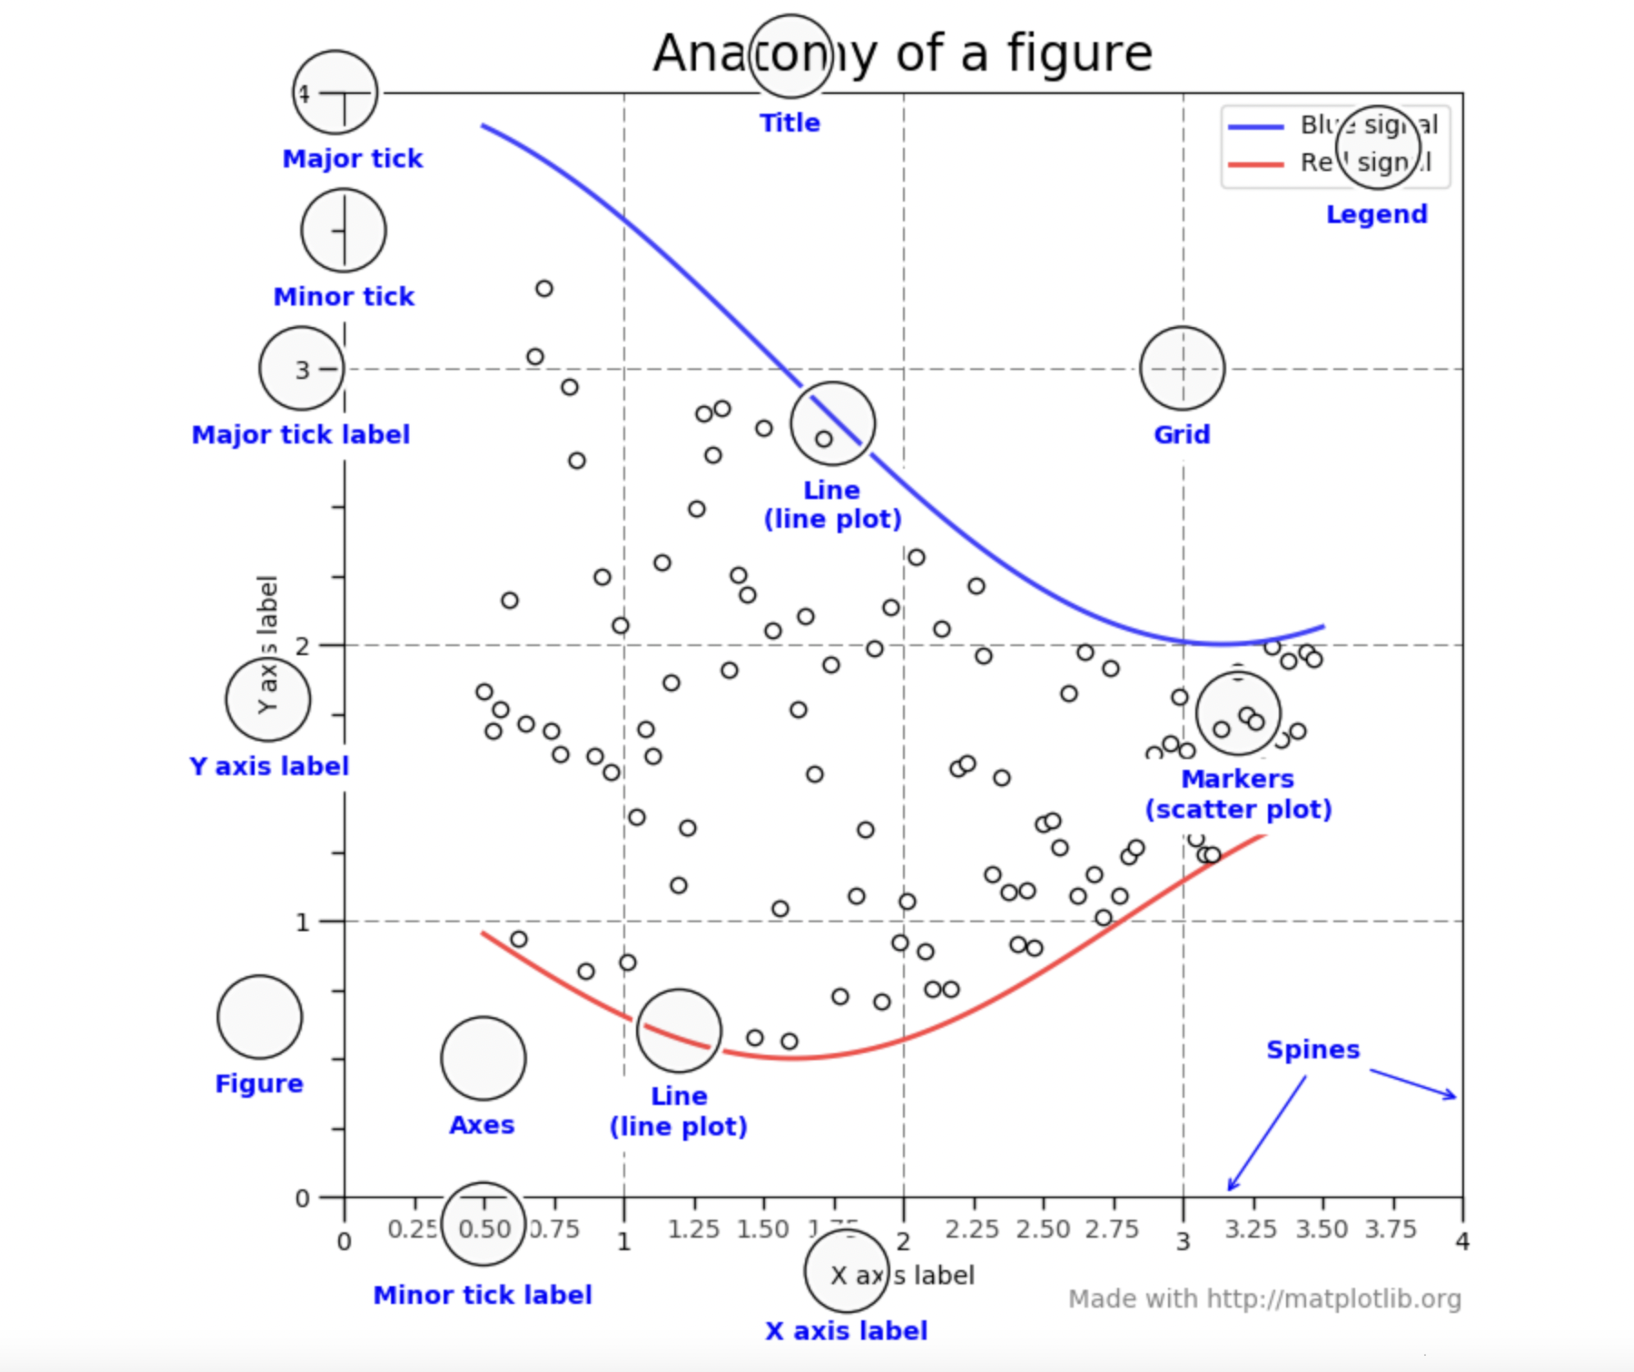

In [19]:
#datetime으로 인덱싱
df = df.set_index('DATE')
df

,DFEDTAR,NASDAQCOM,BAMLH0A0HYM2,HSN1F,UMCSENT,UNRATE,M2,ICSA,NG,ZG,ZI,HG,USD/KRW,USD/EUR,USD/CNY
DATE,,,,,,,,,,,,,,,
1999-01-01,4.75,2208.05,5.63,875.0,103.9,4.3,4395.0,331000.0,2.071,286.4,4.902,0.6440,1186.25,0.8455,8.2793
1999-01-02,4.75,2208.05,5.63,875.0,103.9,4.3,4395.0,331000.0,2.071,286.4,4.902,0.6440,1186.25,0.8455,8.2793
1999-01-03,4.75,2208.05,5.63,875.0,103.9,4.3,4395.0,331000.0,2.071,286.4,4.902,0.6440,1186.25,0.8455,8.2793
1999-01-04,4.75,2208.05,5.63,875.0,103.9,4.3,4395.0,331000.0,2.071,286.4,4.902,0.6440,1186.25,0.8455,8.2793
1999-01-05,4.75,2251.27,5.57,875.0,103.9,4.3,4395.0,331000.0,1.975,286.4,4.902,0.6390,1164.50,0.8501,8.2795
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2021-05-31,0.25,13748.74,3.34,863.0,88.3,5.8,19417.7,385000.0,2.986,1905.3,28.014,4.6775,1106.58,0.8177,6.3688
2021-06-01,0.25,13736.48,3.33,863.0,88.3,5.8,19417.7,385000.0,3.104,1905.0,28.102,4.6535,1108.38,0.8187,6.3796
2021-06-02,0.25,13756.33,3.31,863.0,88.3,5.8,19417.7,385000.0,3.075,1909.9,28.204,4.5915,1110.92,0.8188,6.3805


In [30]:
df.columns

Index(['DFEDTAR', 'NASDAQCOM', 'BAMLH0A0HYM2', 'HSN1F', 'UMCSENT', 'UNRATE',
       'M2', 'ICSA', 'NG', 'ZG', 'ZI', 'HG', 'USD/KRW', 'USD/EUR', 'USD/CNY'],
      dtype='object')

열들이 무엇인지 각각 설명하자면 (1999년 1월 1일부터 ~ 현재까지)

'DFEDTAR', - 미국 기준금리

'NASDAQCOM', - 나스닥 지수

'BAMLH0A0HYM2', - 하이일드채권(고수익 고위험) 스프레드

'HSN1F', - 주택판매지수

'UMCSENT',  - 소비자 심리지수 

'UNRATE', - 실업률 

'M2'- 통화량

'ICSA' - 주간 실업수당 청구건수, 

'NG', 'ZG', 'ZI', 'HG', - 천연가스  금 은 구리 

'USD/KRW', 'USD/EUR', 'USD/CNY' - 달러원화 달러유로 달러위안화 


미국 실업률 대비 기준금리 변화량

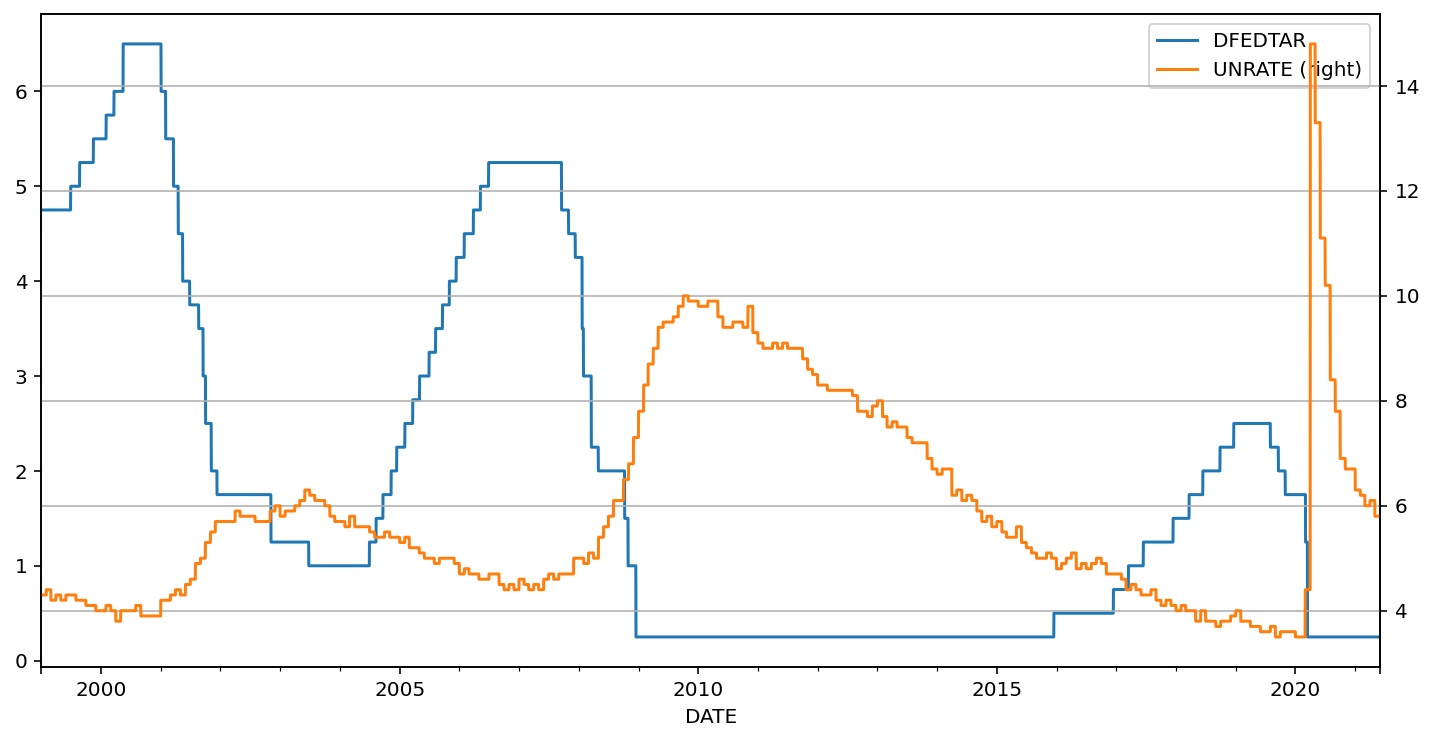

In [25]:
df[['DFEDTAR','UNRATE']].plot(secondary_y = ['UNRATE']);


1.  2008 금융위기 ,그리고 작년 코로나 19 상황에서 실업률이 급격하게 올라가는 것을 볼 수 있으며 그 전에 기준금리를 상승 시켰음을 알 수 있다. 

2.   기준금리 상승이 먼저 되고난 후 실업자가 늘어나는 양상을 보인다. => 이것을 인과관계라고 보기는 어렵다.



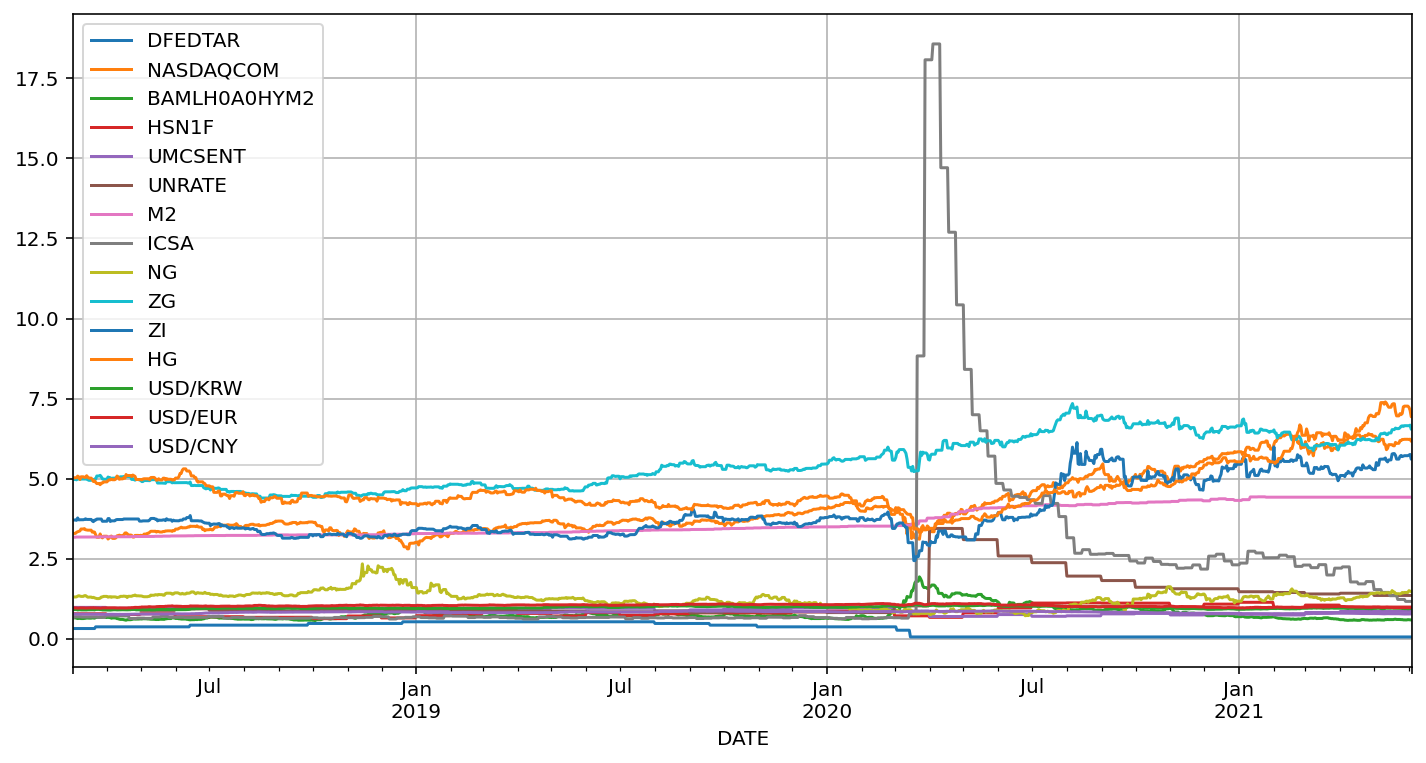

In [35]:
#최근의 전체적인 변화량을 살펴보자 
df_norm = df / df.iloc[0]
df_norm.iloc[7000:].plot()

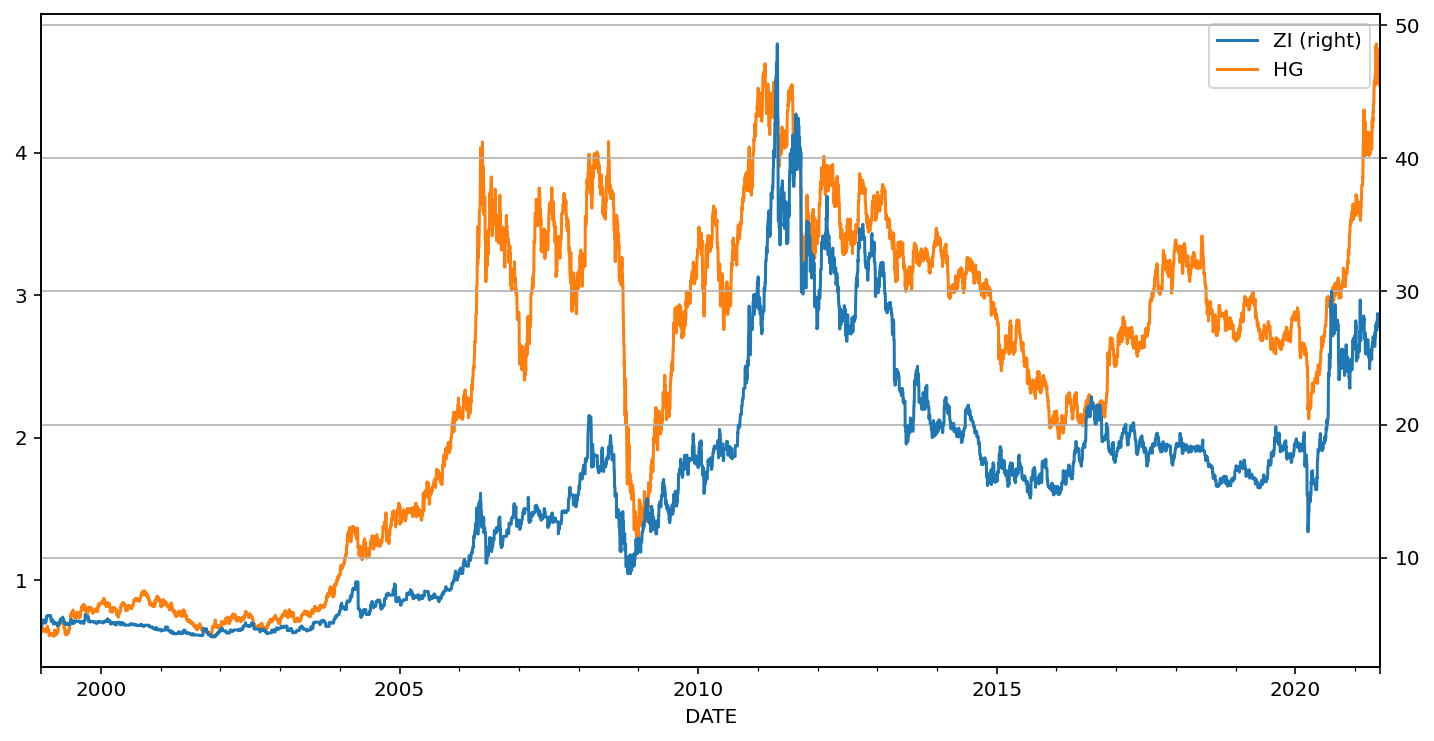

In [41]:
df[['ZI', 'HG']].plot(secondary_y = ['ZI']);#은과 구리 비교 

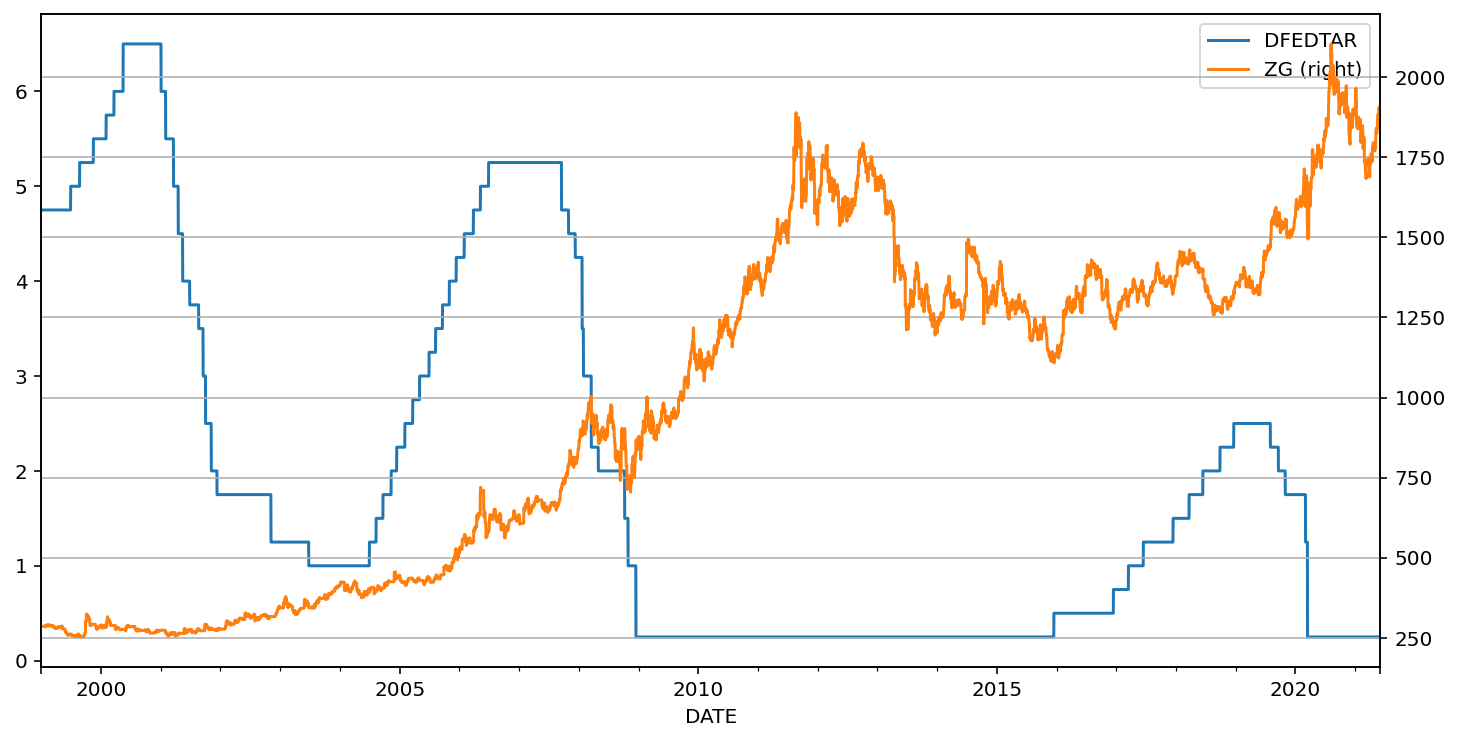

In [42]:
df[['DFEDTAR', 'ZG']].plot(secondary_y = ['ZG']);#금 가격과 기준금리의 비교 

기준금리가 내려갈때 금 가격은 오른다( 우상향은 논외로 두고)

2008년 이후와 코로나 19이후 금 가격은 큰 상승세를 보였다.

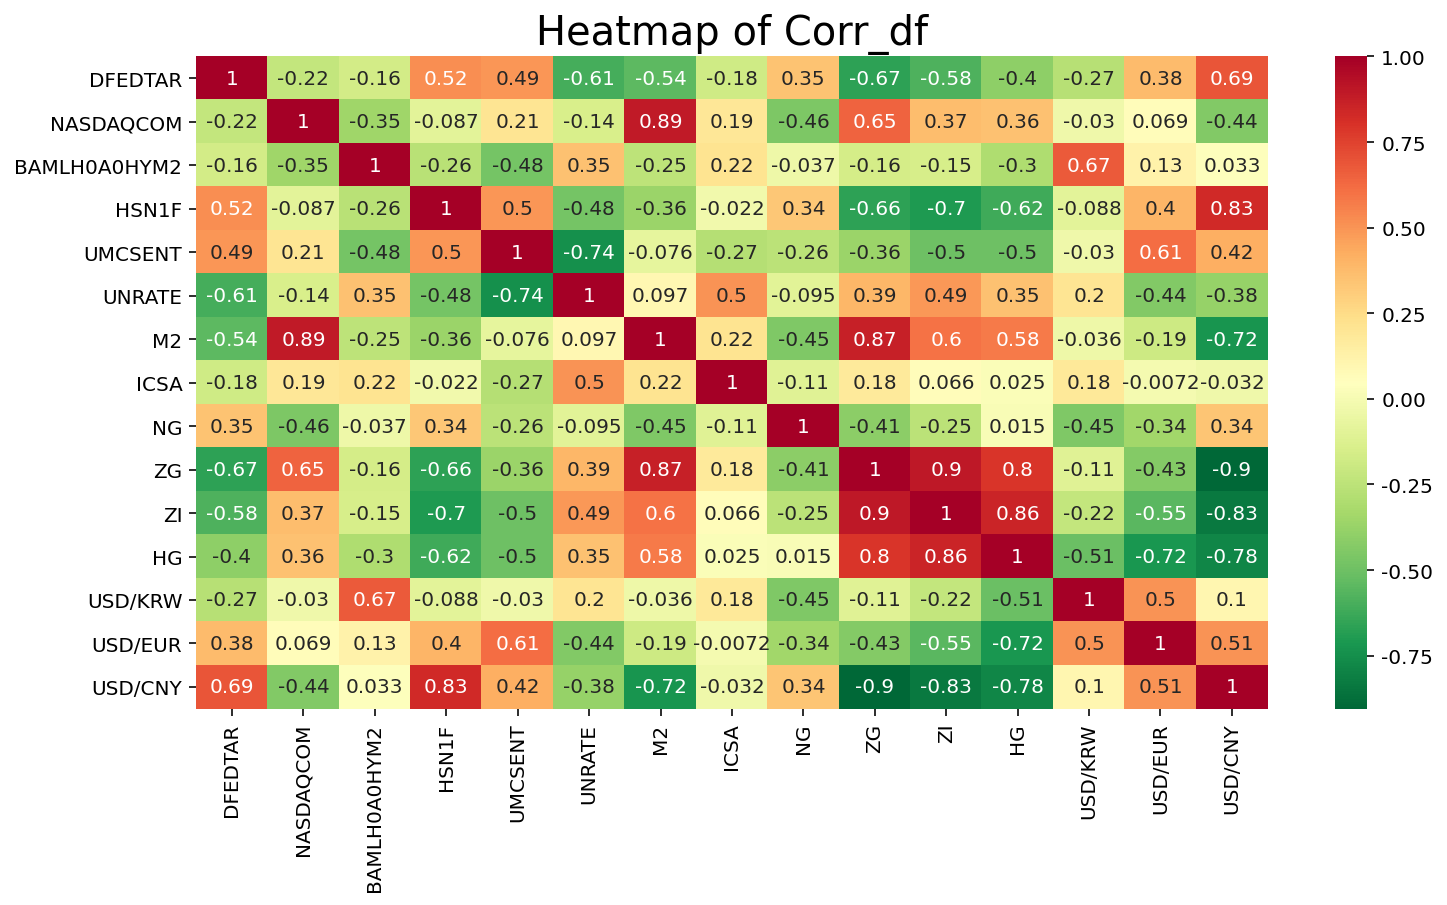

In [73]:
# heatmap by seaborn
q = df.corr()
ax = sns.heatmap(q,annot=True,cmap='RdYlGn_r')

plt.title('Heatmap of Corr_df', fontsize=20)

plt.show() 

zg , hg , zi 와 usd/cny , Hsn1f등이 큰 상관관계가 있는것으로 보인다. / 

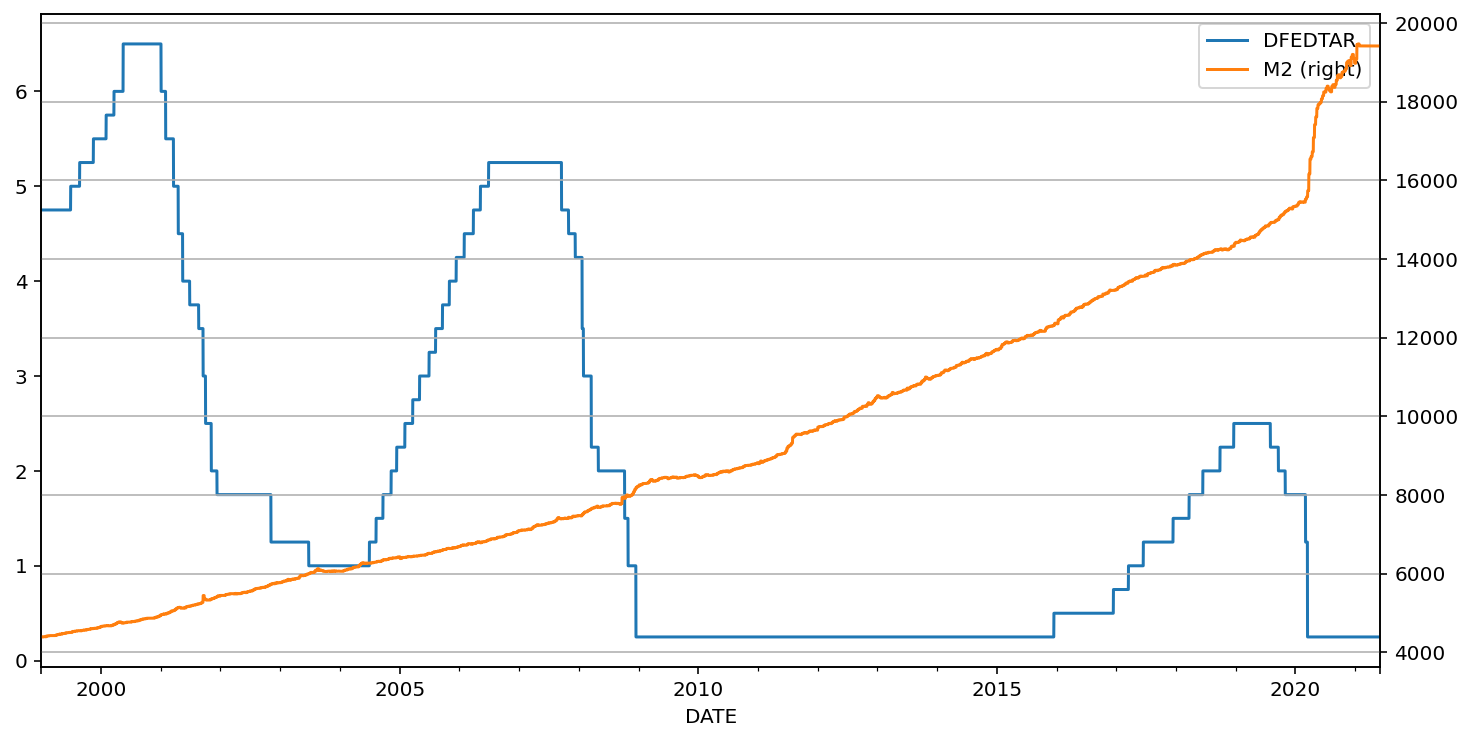

In [80]:
df[['DFEDTAR','M2']].plot(secondary_y = ['M2']);

M2 통화량이랑은 크게 관련이 없는것 같지만 마지막에 크게 증가 한걸로 봐서 대충 마지막 30퍼센트만 더 자세하게 보도록 하겠습니다.

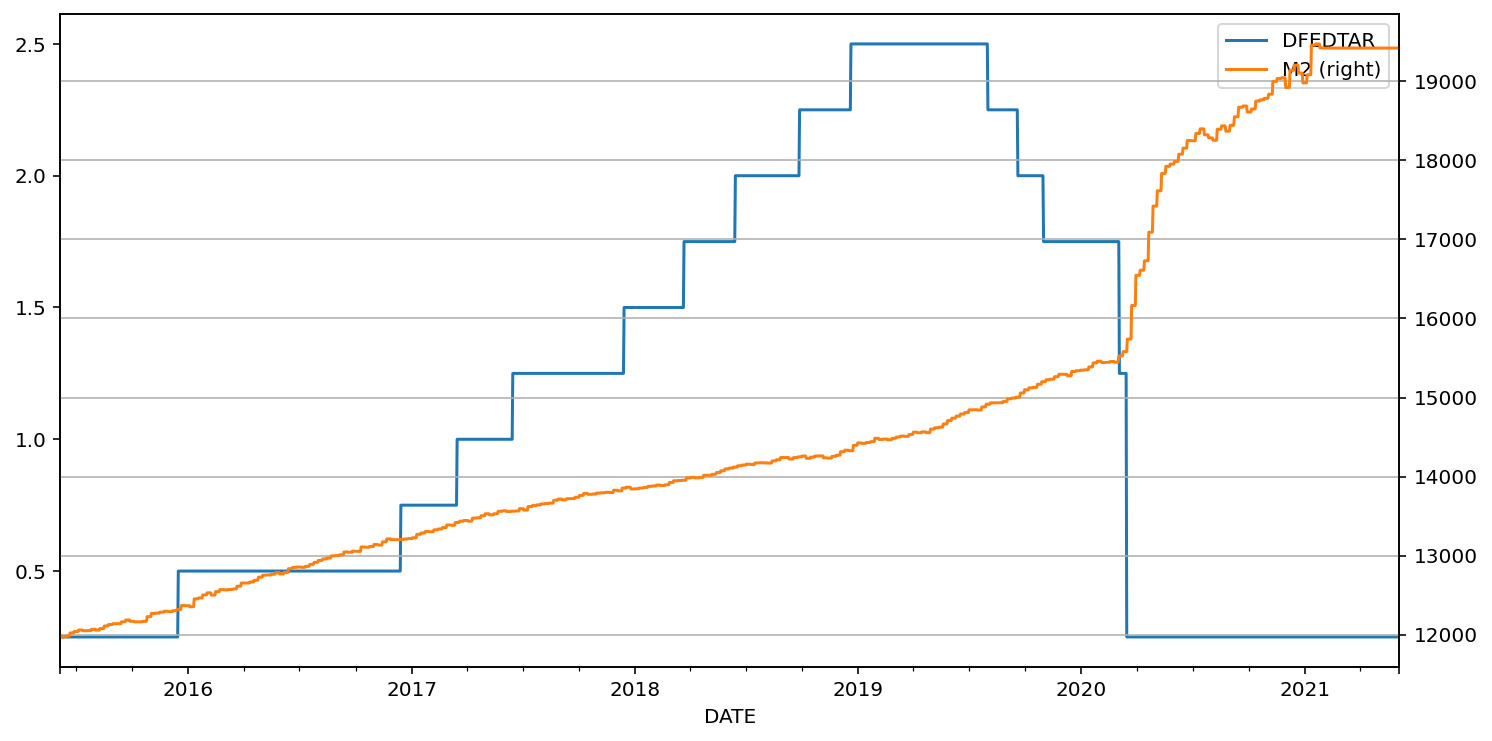

In [81]:
df.iloc[6000:][['DFEDTAR','M2']].plot(secondary_y = ['M2']);

코로나로 인해서 2020.03 쯤에 통화량을 엄청나게 증가시키면서 (유동성 증가) 기준금리를 거의 땅 끝까지 낮춰버린 것을 알 수 있습니다. 양적완화의 길이 열린 것 입니다.